In [ ]:
import pandas as pd
import numpy as np

import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# modules for machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


# silent the warning from the sklearn library
import warnings
warnings.filterwarnings('ignore')

import random # import random package to specify the random seed

random.seed(10) # ensure reproducibilty
np.random.seed(10)

# to interpret the training result
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
selected_features = pd.read_csv(r'Dataset/Features selected/CICDDoS2019_Binary_RFClassifier_30.csv').squeeze()
selected_features = selected_features[:21]

In [ ]:
CICDDoS2019 = pd.read_csv(r'Dataset/Encoded Dataset/CIC-DDoS2019_binary.csv')

# Create the 'columns' list using 'selected_features' and columns starting with 'Label_'
columns = selected_features.tolist() + [col for col in CICDDoS2019.columns if col.startswith('Label_')]

# Use the 'columns' list to select specific columns from 'CICDDoS2019'
CICDDoS2019 = CICDDoS2019[columns]


In [ ]:
CICDDoS2019.shape

(300000, 23)

In [ ]:
target_columns = [col for col in CICDDoS2019.columns if col.startswith('Label_')]

# Sample 30% of the data and reset the index
CICDDoS2019_sampled = CICDDoS2019.sample(frac=0.3, random_state=42).reset_index(drop=True)

# Print class distribution for each target column
for column in target_columns:
    print(f'Class distribution for {column}:')
    print(CICDDoS2019_sampled[column].value_counts())
    print()

Class distribution for Label_benign:
0.0    45099
1.0    44901
Name: Label_benign, dtype: int64

Class distribution for Label_attack:
1.0    45099
0.0    44901
Name: Label_attack, dtype: int64



In [ ]:
# Separate features and labels
DDoS2019_X = CICDDoS2019_sampled.drop(CICDDoS2019_sampled.filter(regex='^Label_'), axis=1).copy() #drop column with prefixed Label_
DDoS2019_y = CICDDoS2019_sampled[CICDDoS2019_sampled.filter(regex='^Label_').columns].copy()


In [ ]:
# Separate features and labels
# DDoS2019_X = CICDDoS2019_sampled.drop('Label', axis=1).copy() #drop column with prefixed Label_
# DDoS2019_y = CICDDoS2019_sampled['Label'].copy()

# Split the dataset into training and testing sets
# DDoS2019_train_X, DDoS2019_test_X, DDoS2019_train_y, DDoS2019_test_y = train_test_split(DDoS2019_X, DDoS2019_y, test_size=0.3)

In [ ]:
scalar = StandardScaler()
# only fit the training data
DDoS2019_X_scaled = scalar.fit_transform(DDoS2019_X)

In [ ]:
models = {
    'k-Nearest Neighbour': KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='distance', metric='manhattan'),
    'Random Forest': RandomForestClassifier(max_depth=30, min_samples_leaf=1e-05, min_samples_split=1e-05, n_estimators=200, n_jobs=-1,criterion='entropy'),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', alpha=1e-05, solver='adam', max_iter=500),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(12, 12, 12), activation='tanh', alpha=0.001, solver='adam', max_iter=1000),
    'XGBoost': xgb.XGBClassifier(n_estimators=400, colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, subsample=0.9)


}


In [ ]:
accuracy_scores = {}
accuracy_scores_mean = {}
accuracy_scores_std = {}

cv = KFold(n_splits=10, shuffle=True)

for model in models:
    clf = models[model]

    accuracy_scores[model] = cross_val_score(clf,
                                            DDoS2019_X_scaled,
                                            DDoS2019_y.values,
                                            cv=cv,
                                            scoring='accuracy',
                                            n_jobs=-1)
    accuracy_scores_mean[model] = np.mean(accuracy_scores[model])
    accuracy_scores_std[model] = np.std(accuracy_scores[model])

    print(f"{'-'*25} {model} {'-'*25}")
    print(f"Accuracy: {accuracy_scores[model]}")
    print(f"mean: {accuracy_scores_mean[model]:.4f}\t\tstd: {accuracy_scores_std[model]:.4f}")

------------------------- k-Nearest Neighbour -------------------------
Accuracy: [0.99955556 0.99855556 0.99888889 0.99944444 0.99933333 0.99922222
 0.99944444 0.99933333 0.99966667 0.99911111]
mean: 0.9993		std: 0.0003
------------------------- Random Forest -------------------------
Accuracy: [0.99977778 0.99988889 0.99966667 0.99977778 0.99966667 0.99977778
 0.99955556 0.99977778 0.99977778 0.99977778]
mean: 0.9997		std: 0.0001
------------------------- Artificial Neural Network -------------------------
Accuracy: [0.99477778 0.99722222 0.99633333 0.99633333 0.99555556 0.99666667
 0.99622222 0.99644444 0.99566667 0.99588889]
mean: 0.9961		std: 0.0006
------------------------- Deep Neural Network -------------------------
Accuracy: [0.99711111 0.99711111 0.99533333 0.99611111 0.99711111 0.99544444
 0.99655556 0.99622222 0.99577778 0.995     ]
mean: 0.9962		std: 0.0007
------------------------- XGBoost -------------------------
Accuracy: [0.99966667 0.99966667 0.99977778 0.99988889 0

In [ ]:
accuracy_scores = {}
accuracy_scores_mean = {}
accuracy_scores_std = {}

cv = KFold(n_splits=5, shuffle=True)

for model in models:
    clf = models[model]

    accuracy_scores[model] = cross_val_score(clf,
                                            DDoS2019_X_scaled,
                                            DDoS2019_y.values,
                                            cv=cv,
                                            scoring='accuracy',
                                            n_jobs=-1)
    accuracy_scores_mean[model] = np.mean(accuracy_scores[model])
    accuracy_scores_std[model] = np.std(accuracy_scores[model])

    print(f"{'-'*25} {model} {'-'*25}")
    print(f"Accuracy: {accuracy_scores[model]}")
    print(f"mean: {accuracy_scores_mean[model]:.4f}\t\tstd: {accuracy_scores_std[model]:.4f}")

------------------------- k-Nearest Neighbour -------------------------
Accuracy: [0.99922222 0.99911111 0.99955556 0.99905556 0.99911111]
mean: 0.9992		std: 0.0002
------------------------- Random Forest -------------------------
Accuracy: [0.99966667 0.99955556 0.99961111 1.         0.99961111]
mean: 0.9997		std: 0.0002
------------------------- Artificial Neural Network -------------------------
Accuracy: [0.996      0.99555556 0.9965     0.99616667 0.99605556]
mean: 0.9961		std: 0.0003
------------------------- Deep Neural Network -------------------------
Accuracy: [0.9975     0.99744444 0.99561111 0.9965     0.99627778]
mean: 0.9967		std: 0.0007
------------------------- XGBoost -------------------------
Accuracy: [0.99983333 0.99983333 0.99972222 0.99961111 0.99983333]
mean: 0.9998		std: 0.0001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


# Separate features and labels
DDoS2019_X = CICDDoS2019_sampled.drop(CICDDoS2019_sampled.filter(regex='^Label_'), axis=1).copy()
DDoS2019_y = CICDDoS2019_sampled[CICDDoS2019_sampled.filter(regex='^Label_').columns].copy()

# Scale the features
scalar = StandardScaler()
DDoS2019_X_scaled = scalar.fit_transform(DDoS2019_X)

models = {
    'k-Nearest Neighbour': KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='distance', metric='manhattan'),
    'Random Forest': RandomForestClassifier(max_depth=30, min_samples_leaf=1e-05, min_samples_split=1e-05, n_estimators=200, n_jobs=-1, criterion='entropy'),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', alpha=1e-05, solver='adam', max_iter=500),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(12, 12, 12), activation='tanh', alpha=0.001, solver='adam', max_iter=1000),
    'XGBoost': xgb.XGBClassifier(n_estimators=400, colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, subsample=0.9)
}

# Initialize dictionaries to store accuracy scores and mean/std values
accuracy_scores = {}
accuracy_scores_mean = {}
accuracy_scores_std = {}

# Initialize the figure for learning curve plots
plt.figure()

# Iterate over each model
for model in models:
    clf = models[model]

    # Compute the learning curve for the current model
    train_sizes, train_scores, test_scores = learning_curve(clf, DDoS2019_X_scaled, DDoS2019_y.values, cv=10, scoring='accuracy', n_jobs=-1)

    # Compute mean and standard deviation of train/test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Store the scores in dictionaries
    accuracy_scores[model] = test_scores
    accuracy_scores_mean[model] = test_scores_mean[-1]
    accuracy_scores_std[model] = test_scores_std[-1]

    # Plot the learning curve for the current model
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Testing Accuracy")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve: {model}")
    plt.legend(loc="best")
    plt.show()

    print(f"{'-'*25} {model} {'-'*25}")
    print(f"Accuracy: {accuracy_scores[model]}")
    print(f"Mean: {accuracy_scores_mean[model]:.4f}\t\tStd: {accuracy_scores_std[model]:.4f}")


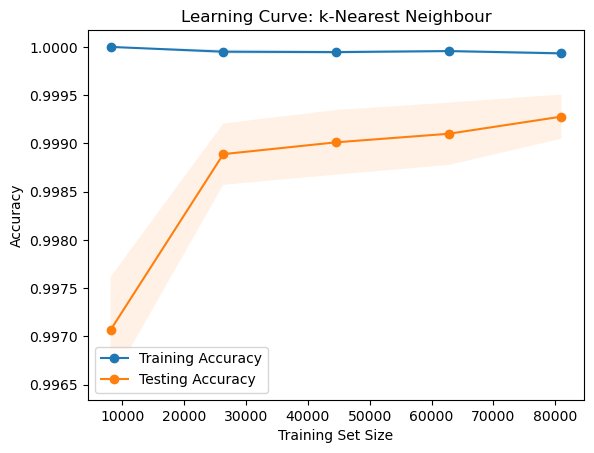

------------------------- k-Nearest Neighbour -------------------------
Accuracy: [[0.99811111 0.997      0.99666667 0.99688889 0.998      0.99722222
  0.99688889 0.99633333 0.99655556 0.997     ]
 [0.999      0.99866667 0.99877778 0.99888889 0.99911111 0.99933333
  0.99933333 0.99866667 0.99822222 0.99888889]
 [0.99911111 0.999      0.99922222 0.999      0.99944444 0.99922222
  0.99944444 0.99866667 0.99855556 0.99844444]
 [0.99911111 0.99933333 0.99933333 0.99922222 0.99955556 0.999
  0.99944444 0.99866667 0.99877778 0.99855556]
 [0.99922222 0.99955556 0.99922222 0.99922222 0.99966667 0.99944444
  0.99944444 0.999      0.999      0.999     ]]
Mean: 0.9993		Std: 0.0002


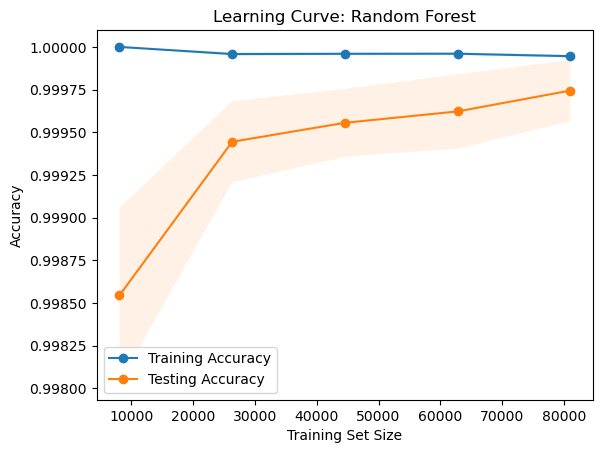

------------------------- Random Forest -------------------------
Accuracy: [[0.999      0.99833333 0.99822222 0.99888889 0.99844444 0.99922222
  0.99733333 0.99855556 0.99844444 0.999     ]
 [0.99944444 0.99955556 0.99922222 0.99966667 0.99977778 0.99977778
  0.99911111 0.99911111 0.99933333 0.99944444]
 [0.99966667 0.99955556 0.99944444 0.99966667 0.99977778 0.99977778
  0.99966667 0.99911111 0.99933333 0.99955556]
 [0.99966667 0.99977778 0.99977778 0.99977778 0.99988889 0.99966667
  0.99966667 0.99911111 0.99944444 0.99944444]
 [0.99966667 0.99977778 0.99977778 0.99977778 0.99988889 0.99988889
  0.99977778 0.99933333 0.99955556 1.        ]]
Mean: 0.9997		Std: 0.0002


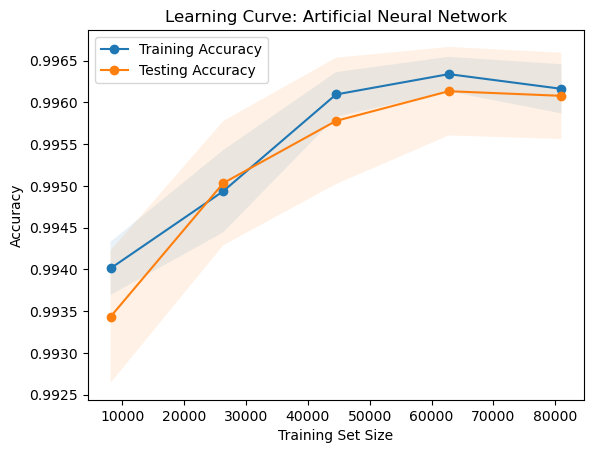

------------------------- Artificial Neural Network -------------------------
Accuracy: [[0.99422222 0.99366667 0.99244444 0.99411111 0.99444444 0.99422222
  0.993      0.99211111 0.99266667 0.99344444]
 [0.99522222 0.99433333 0.99355556 0.99544444 0.99522222 0.99511111
  0.99644444 0.99444444 0.99555556 0.995     ]
 [0.99577778 0.99533333 0.99477778 0.99566667 0.99588889 0.99677778
  0.99744444 0.99544444 0.99566667 0.995     ]
 [0.99588889 0.996      0.99566667 0.99644444 0.99655556 0.99644444
  0.99722222 0.99522222 0.99611111 0.99577778]
 [0.99588889 0.99644444 0.99566667 0.99644444 0.99666667 0.99622222
  0.99688889 0.99544444 0.99588889 0.99522222]]
Mean: 0.9961		Std: 0.0005


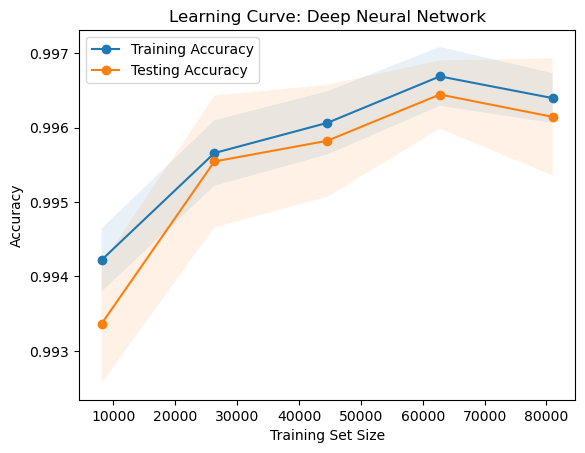

------------------------- Deep Neural Network -------------------------
Accuracy: [[0.99322222 0.994      0.99211111 0.99266667 0.99466667 0.99466667
  0.99322222 0.99277778 0.993      0.99333333]
 [0.99577778 0.99488889 0.99433333 0.99644444 0.996      0.99655556
  0.997      0.99455556 0.99477778 0.99511111]
 [0.99522222 0.99488889 0.995      0.99666667 0.997      0.99622222
  0.99666667 0.995      0.99555556 0.996     ]
 [0.99677778 0.99677778 0.99633333 0.99655556 0.99666667 0.99622222
  0.99733333 0.99566667 0.99622222 0.99588889]
 [0.99633333 0.99588889 0.99577778 0.99622222 0.99766667 0.99633333
  0.99722222 0.99477778 0.99566667 0.99555556]]
Mean: 0.9961		Std: 0.0008


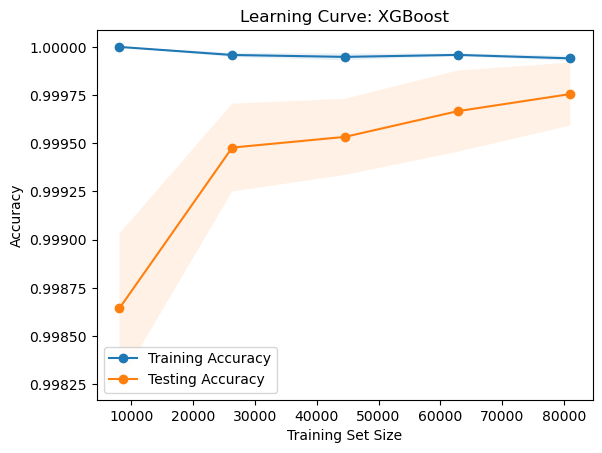

------------------------- XGBoost -------------------------
Accuracy: [[0.99866667 0.99844444 0.99833333 0.999      0.99844444 0.99933333
  0.99811111 0.99855556 0.99833333 0.99922222]
 [0.99944444 0.99977778 0.99933333 0.99966667 0.99955556 0.99977778
  0.99933333 0.999      0.99933333 0.99955556]
 [0.99966667 0.99977778 0.99955556 0.99966667 0.99955556 0.99955556
  0.99955556 0.999      0.99944444 0.99955556]
 [0.99977778 0.99988889 0.99977778 0.99977778 0.99977778 0.99966667
  0.99977778 0.99911111 0.99955556 0.99955556]
 [0.99966667 0.99988889 0.99977778 0.99977778 0.99988889 0.99977778
  0.99988889 0.99933333 0.99966667 0.99988889]]
Mean: 0.9998		Std: 0.0002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


# Separate features and labels
DDoS2019_X = CICDDoS2019_sampled.drop(CICDDoS2019_sampled.filter(regex='^Label_'), axis=1).copy()
DDoS2019_y = CICDDoS2019_sampled[CICDDoS2019_sampled.filter(regex='^Label_').columns].copy()

# Scale the features
scalar = StandardScaler()
DDoS2019_X_scaled = scalar.fit_transform(DDoS2019_X)

models = {
    'k-Nearest Neighbour': KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='distance', metric='manhattan'),
    'Random Forest': RandomForestClassifier(max_depth=30, min_samples_leaf=1e-05, min_samples_split=1e-05, n_estimators=200, n_jobs=-1, criterion='entropy'),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', alpha=1e-05, solver='adam', max_iter=500),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(12, 12, 12), activation='tanh', alpha=0.001, solver='adam', max_iter=1000),
    'XGBoost': xgb.XGBClassifier(n_estimators=400, colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, subsample=0.9)
}

# Initialize dictionaries to store accuracy scores and mean/std values
accuracy_scores = {}
accuracy_scores_mean = {}
accuracy_scores_std = {}

# Initialize the figure for learning curve plots
plt.figure()

# Iterate over each model
for model in models:
    clf = models[model]

    # Compute the learning curve for the current model
    train_sizes, train_scores, test_scores = learning_curve(clf, DDoS2019_X_scaled, DDoS2019_y.values, cv=10, scoring='accuracy', n_jobs=-1)

    # Compute mean and standard deviation of train/test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Store the scores in dictionaries
    accuracy_scores[model] = test_scores
    accuracy_scores_mean[model] = test_scores_mean[-1]
    accuracy_scores_std[model] = test_scores_std[-1]

    # Plot the learning curve for the current model
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Testing Accuracy")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve: {model}")
    plt.legend(loc="best")
    plt.show()

    print(f"{'-'*25} {model} {'-'*25}")
    print(f"Accuracy: {accuracy_scores[model]}")
    print(f"Mean: {accuracy_scores_mean[model]:.4f}\t\tStd: {accuracy_scores_std[model]:.4f}")
